In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df['Gender']=df['Gender'].map({"Female":1,"Male":0},np.int64)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


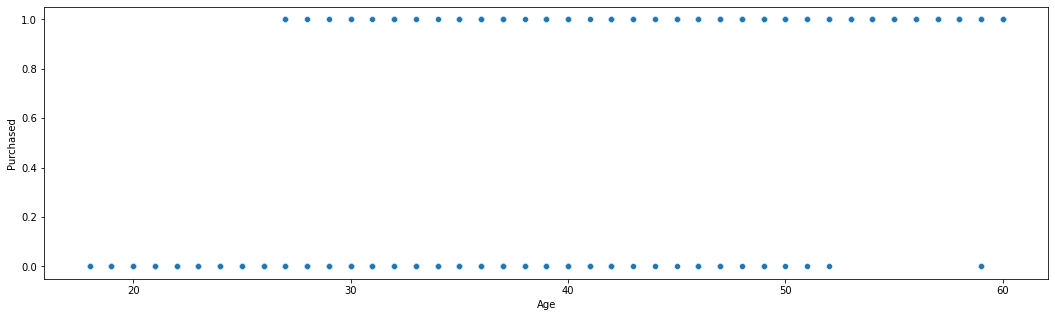

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(x=df['Age'],y=df['Purchased'], ax=ax)
plt.show()

##From the above and below fig we concluded that who had age b/w 25-50,whose sal is grater than 60,000 are willing to purchase social network ads.


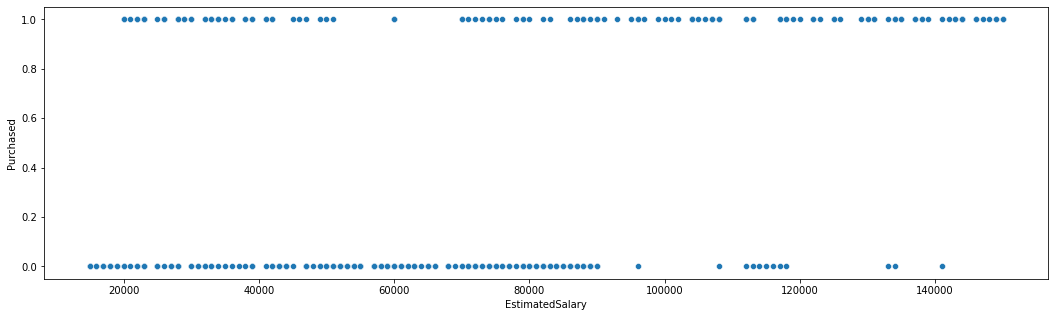

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(x=df['EstimatedSalary'],y=df['Purchased'], ax=ax)
plt.show()
  

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


In [ ]:
x=df.drop('Purchased',axis=1,)
y=to_categorical(df['Purchased'])
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
train_in.shape

(400, 4)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [ ]:
in_layer=Dense(1)
hiddenlayer1=Dense(50)
hiddenlayer2=Dense(100)
out_layer=Dense(2,activation='Softmax',)

In [ ]:
model=Sequential()
model.add(in_layer)
model.add(hiddenlayer1)
model.add(hiddenlayer2)
model.add(out_layer)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=350)

Epoch 1/350
10/10 [==============================] - 0s 7ms/step - loss: 4705.8369 - accuracy: 0.5781 - val_loss: 9801.9746 - val_accuracy: 0.3750
Epoch 2/350
10/10 [==============================] - 0s 3ms/step - loss: 4278.1040 - accuracy: 0.5094 - val_loss: 5100.0132 - val_accuracy: 0.6250
Epoch 3/350
10/10 [==============================] - 0s 5ms/step - loss: 6952.8530 - accuracy: 0.5719 - val_loss: 11331.9639 - val_accuracy: 0.6250
Epoch 4/350
10/10 [==============================] - 0s 4ms/step - loss: 4804.6006 - accuracy: 0.5969 - val_loss: 3720.1094 - val_accuracy: 0.3750
Epoch 5/350
10/10 [==============================] - 0s 4ms/step - loss: 3453.4233 - accuracy: 0.5156 - val_loss: 2110.2922 - val_accuracy: 0.6250
Epoch 6/350
10/10 [==============================] - 0s 4ms/step - loss: 5978.9023 - accuracy: 0.5031 - val_loss: 11564.1064 - val_accuracy: 0.3750
Epoch 7/350
10/10 [==============================] - 0s 3ms/step - loss: 11800.5420 - accuracy: 0.5781 - val_loss: 6

In [ ]:
predict=model.predict(x_train)

In [ ]:
predict[1]

array([0.83250916, 0.16749083], dtype=float32)

In [ ]:
np.argmax(predict[10])

1

In [ ]:
np.argmax(predict[7])

0